In [1]:
%matplotlib inline
from ipywidgets import interact, FloatSlider, HTML
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font',size=18)
import matplotlib.ticker as plticker
import matplotlib.patches as patches
import numpy as np
import warnings
import os.path


from hyperfet.devices import SCMOSFET,VO2,HyperFET, Direction
import hyperfet.approximations as appr
import hyperfet.extractions as extr
from hyperfet.references import si#, mixed_vo2_params
from hyperfet.fitting import show_transistor
from hyperfet import ABSTRACT_IMAGE_DIR

In [2]:
def ylog():
    with warnings.catch_warnings():
        warnings.filterwarnings('error')
        plt.yscale('log')
def tighten():
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        plt.tight_layout()

In [3]:
# Parameters given for Figure 3

vo2_params={
    "rho_m":si("3e-4 ohm cm"),
    "rho_i":si("30 ohm cm"),
    "J_MIT":si("1e6 A/cm^2"),
    "J_IMT":si(".5e4 A/cm^2"),
    "v_met": si(".05 V/ (20nm)")
}

#vo2=VO2(**vo2_params)

VDD=.5

In [4]:
opts={
    'figsize': (6,7),
    'linidvgpos': [.3,.68,.2,.2],
    'linidvgxticks': [0,.25,.5],
    'linidvgxlim': [0,.5],
    'linidvgyticks': [100,200,300],
    'linidvdpos': [.62,.25,.25,.3],
    'linidvdxticks': [0,.25,.5],
    'linidvdyticks': [0,100,200,300],
}

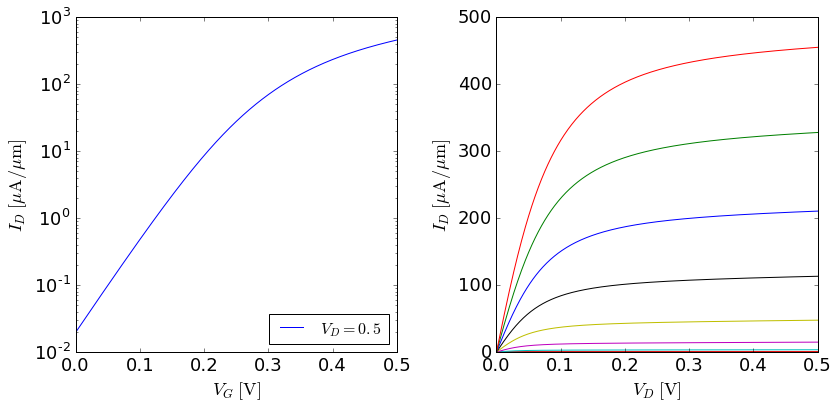

In [5]:
fet=None
@interact(VT0=FloatSlider(value=.32,min=0,max=1,step=.05,continuous_update=False),
          W=FloatSlider(value=100,min=10,max=100,step=10,continuous_update=False),
          Cinv_vxo=FloatSlider(value=2500,min=1000,max=5000,step=400,continuous_update=False),
          SS=FloatSlider(value=.070,min=.05,max=.09,step=.005,continuous_update=False),
          alpha=FloatSlider(value=2.5,min=0,max=5,step=.5,continuous_update=False),
          beta=FloatSlider(value=1.8,min=0,max=4,step=.1,continuous_update=False),
          VDD=FloatSlider(value=.5,min=.3,max=1,step=.05,continuous_update=False),
          VDsats=FloatSlider(value=.1,min=.1,max=2,step=.1,continuous_update=False),
          delta=FloatSlider(value=.01,min=0,max=.5,step=.05,continuous_update=False),
          log10Gleak=FloatSlider(value=-12,min=-14,max=-5,step=1,continuous_update=False)
         )
def show_HEMT(VT0,W,Cinv_vxo,SS,alpha,beta,VDsats,VDD,delta,log10Gleak):
    global fet
    plt.figure(figsize=(12,6))
    fet=SCMOSFET(
        W=W*1e-9,Cinv_vxo=Cinv_vxo,
        VT0=VT0,alpha=alpha,SS=SS,delta=delta,
        VDsats=VDsats,beta=beta,Gleak=10**log10Gleak)
    
    plt.subplot(121)
    VD=np.array(VDD)
    VG=np.linspace(0,.5,500)
    VDgrid,VGgrid=np.meshgrid(VD,VG)
    I=fet.ID(VD=VDgrid,VG=VGgrid)
    plt.plot(VG,I/fet.W,label=r"$V_D={:.2g}$".format(VDD))
    plt.yscale('log')
    plt.xlabel(r"$V_G\;\mathrm{[V]}$")
    plt.ylabel(r"$I_D\;\mathrm{[\mu A/\mu m]}$")
    plt.legend(loc='lower right',fontsize=16)
    
    plt.subplot(122)
    VD=np.linspace(0,VDD,500)
    VG=np.linspace(0,VDD,10)
    VDgrid,VGgrid=np.meshgrid(VD,VG)
    I=fet.ID(VD=VDgrid,VG=VGgrid)
    plt.plot(VD,I.T/fet.W)
    plt.xlabel(r"$V_D\;\mathrm{[V]}$")
    plt.ylabel(r"$I_D\;\mathrm{[\mu A/\mu m]}$")
    #plt.legend([r"$V_G={:.2g}$".format(vg) for vg in VG],loc='lower right',fontsize=16)
    
    plt.tight_layout()

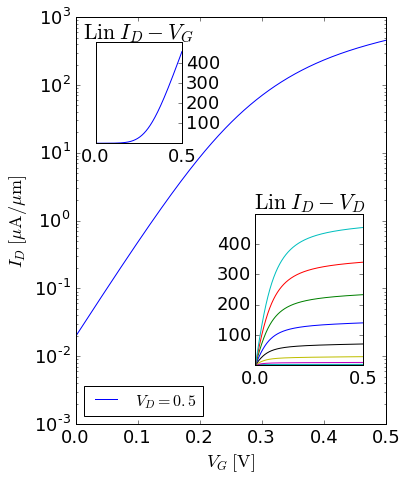

In [6]:
opts={
    'figsize': (6,7),
    'linidvgpos': [.25,.69,.2,.2],
    'linidvgxticks': [0,.5],
    'linidvgxlim': [0,.5],
    'linidvgyticks': [100,200,300,400],
    'linidvdpos': [.62,.25,.25,.3],
    'linidvdxticks': [0,.5],
    'linidvdyticks': [100,200,300,400],
}
show_transistor(fet,VDD,data=None,**opts)
plt.gcf().get_axes()[0].set_ylim(1e-3,1e3)
plt.savefig(os.path.join(ABSTRACT_IMAGE_DIR,"Transistor.eps"))
plt.savefig(os.path.join(ABSTRACT_IMAGE_DIR,"Transistor.png"))

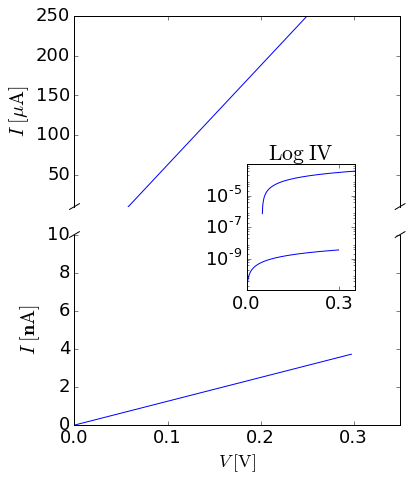

In [7]:
vo2=VO2(L=20e-9,W=15e-9,T=5e-9,**vo2_params)


fig, (ax, ax2) = plt.subplots(2, 1, sharex=True,figsize=(6,7))

I=np.logspace(-4,4,1000)*fet.W
V=vo2.V(I,direc=Direction.FORWARD)

plt.axes(ax)
plt.plot(V,I*1e6)
plt.ylabel(r"$I\;\mathrm{[{\bf\mu} A]}$",fontsize=20)
plt.ylim(10,250)

plt.axes(ax2)
plt.plot(V,I*1e9)
plt.ylim(0,10)
plt.ylabel(r"$I\;\mathrm{[{\bf n}A]}$",fontsize=20)
plt.xlim(0,.35)
plt.xlabel("$V\;\mathrm{[V]}$")
ax2.xaxis.set_major_locator(plticker.MultipleLocator(base=.1))

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()


d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal


plt.axes([.6,.4,.25,.25])
plt.plot(V,I)
plt.yscale('log')
plt.xticks([0,.3])
plt.xlim(0,.35)
#plt.ylabel('$I\;\mathrm{[A]}$')
plt.title("$\mathrm{Log\;IV}$")
plt.yticks([1e-9,1e-7,1e-5])


with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    plt.tight_layout()
#plt.yscale('log')


#plt.yscale('log')


plt.savefig(os.path.join(ABSTRACT_IMAGE_DIR,"PCR.eps"))
plt.savefig(os.path.join(ABSTRACT_IMAGE_DIR,"PCR.png"))

/home/sam/miniconda3/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


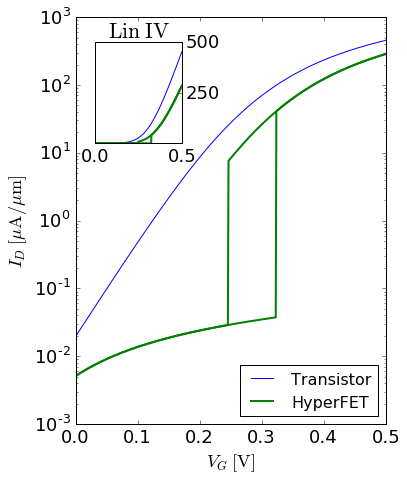

In [8]:
VD=np.array(VDD)
VG=np.linspace(0,.5,500)

plt.figure(figsize=(6,7))
plt.plot(VG,fet.ID(VD,VG)/fet.W,label='Transistor')

hf=HyperFET(fet,vo2)
#hf=HyperFET(fet.shifted(appr.shift(HyperFET(fet,vo2),VDD)),vo2)

If,Ib=[np.ravel(i) for i in hf.I_double(VD=VD,VG=VG)]
l=plt.plot(VG[~np.isnan(If)],If[~np.isnan(If)]/fet.W,linewidth=2,label='HyperFET')[0]
plt.plot(VG[~np.isnan(Ib)],Ib[~np.isnan(Ib)]/fet.W,linewidth=2,color=l.get_color())
    
plt.yscale('log')
plt.xlabel(r"$V_G\;\mathrm{[V]}$")
plt.ylabel(r"$I_D\;\mathrm{[\mu A/\mu m]}$")

plt.legend(loc='lower right',fontsize=16)

plt.axes([.25,.69,.2,.2])
plt.gca().yaxis.tick_right()
plt.plot(VG,fet.ID(VD,VG)/fet.W)
l=plt.plot(VG[~np.isnan(If)],If[~np.isnan(If)]/fet.W,linewidth=2)[0]
plt.plot(VG[~np.isnan(Ib)],Ib[~np.isnan(Ib)]/fet.W,linewidth=2,color=l.get_color())
plt.xticks([0,.5])
plt.yticks([250,500])
plt.title("$\mathrm{Lin\;IV}$");

plt.tight_layout()

plt.savefig(os.path.join(ABSTRACT_IMAGE_DIR,"HyperFET.svg"))
plt.savefig(os.path.join(ABSTRACT_IMAGE_DIR,"HyperFET.png"))


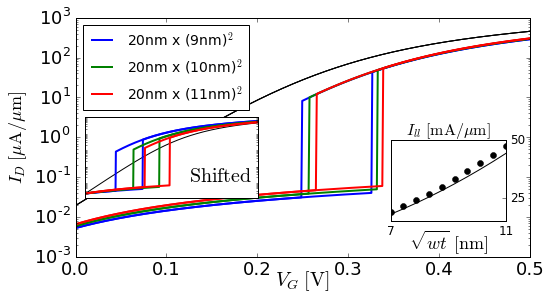

In [9]:
VD=np.array(VDD)
VG=np.linspace(0,.5,500)

plt.figure(figsize=(8,4.5))


for LWT in ["20nm x (9nm)^2", "20nm x (10nm)^2", "20nm x (11nm)^2"]:
    L,WT=[si(x) for x in LWT.split("x")]
    W=np.sqrt(WT);T=np.sqrt(WT)
    
    vo2=VO2(L=L,W=W,T=T,**vo2_params)
    
    #plt.subplot(121)
    plt.plot(VG,fet.ID(VD,VG)/fet.W,'k')
    hf=HyperFET(fet,vo2)
    If,Ib=[np.ravel(i) for i in hf.I_double(VD=VD,VG=VG)]
    l=plt.plot(VG[~np.isnan(If)],If[~np.isnan(If)]/fet.W,label=LWT.replace("^2","$^2$"),linewidth=2)[0]
    plt.plot(VG[~np.isnan(Ib)],Ib[~np.isnan(Ib)]/fet.W,linewidth=2,color=l.get_color())
    
plt.yscale('log')
plt.xlabel(r"$V_G\;\mathrm{[V]}$",fontsize=20,labelpad=-10)
plt.ylabel(r"$I_D\;\mathrm{[\mu A/\mu m]}$")
plt.legend(loc='upper left',fontsize=14)


plt.axes([.17,.35,.3,.25])
plt.plot(VG,fet.ID(VD,VG)/fet.W,'k')
for LWT in ["20nm x 15nm x 5nm", "20nm x 20nm x 5nm", "20nm x 25nm x 5nm"]:
    L,W,T=[si(x) for x in LWT.split("x")]
    vo2=VO2(L=L,W=W,T=T,**vo2_params)
    
    hf=HyperFET(fet.shifted(appr.shift(HyperFET(fet,vo2),VDD)),vo2)
    If,Ib=[np.ravel(i) for i in hf.I_double(VD=VD,VG=VG)]
    l=plt.plot(VG[~np.isnan(If)],If[~np.isnan(If)]/fet.W,linewidth=2)[0]
    plt.plot(VG[~np.isnan(Ib)],Ib[~np.isnan(Ib)]/fet.W,linewidth=2,color=l.get_color())
    
plt.yscale('log')
plt.yticks([])
plt.xticks([])
    
plt.text(.3,.1,"$\mathrm{Shifted}$",fontsize=20)

plt.axes([.7,.28,.2,.25])
plt.gca().yaxis.tick_right()
Ill_appr=[]
Ill_extr=[]
Ws=np.linspace(7,11,10)
for W in Ws:
    L,W,T=20e-9,W*1e-9,W*1e-9
    vo2=VO2(L=L,W=W,T=T,**vo2_params)
    hf=HyperFET(fet,vo2)
    If,Ib=[np.ravel(i) for i in hf.I_double(VD=VD,VG=VG)]
    
    Ill_appr+=[appr.Ill(hf,VDD)]
    Ill_extr+=[extr.left(VG,If,Ib)[1]]

plt.plot(Ws,np.array(Ill_appr)*1e3/fet.W,'k')
plt.plot(Ws,np.array(Ill_extr)*1e3/fet.W,'ko')
plt.yticks([25,50])
plt.xticks([7,11])
plt.xlabel(r'$\sqrt{wt}\ \mathrm{[nm]}$',labelpad=-10)
plt.tick_params(labelsize=12)
plt.title(r'$I_{ll}\ \mathrm{[mA/\mu m]}$',fontsize=16)
#plt.yscale('log')


tighten()
plt.savefig(os.path.join(ABSTRACT_IMAGE_DIR,"HFvsA.svg"))
plt.savefig(os.path.join(ABSTRACT_IMAGE_DIR,"HFvsA.png"))

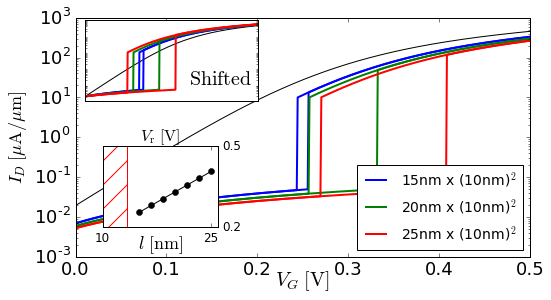

In [10]:
VD=np.array(VDD)
VG=np.linspace(0,.5,500)

plt.figure(figsize=(8,4.5))
plt.plot(VG,fet.ID(VD,VG)/fet.W,'k')

for LWT in ["15nm x (10nm)^2", "20nm x (10nm)^2", "25nm x (10nm)^2"]:
    L,WT=[si(x) for x in LWT.split("x")]
    W=np.sqrt(WT);T=np.sqrt(WT);
    vo2=VO2(L=L,W=W,T=T,**vo2_params)
    hf=HyperFET(fet,vo2)
    
    If,Ib=[np.ravel(i) for i in hf.I_double(VD=VD,VG=VG)]
    l=plt.plot(VG[~np.isnan(If)],If[~np.isnan(If)]/fet.W,label=LWT.replace("^2","$^2$"),linewidth=2)[0]
    plt.plot(VG[~np.isnan(Ib)],Ib[~np.isnan(Ib)]/fet.W,linewidth=2,color=l.get_color())
    
plt.yscale('log')
plt.xlabel(r"$V_G\;\mathrm{[V]}$",fontsize=20,labelpad=-10)
plt.ylabel(r"$I_D\;\mathrm{[\mu A/\mu m]}$")
plt.legend(loc='lower right',fontsize=14)    

plt.axes([.17,.65,.3,.25])
plt.plot(VG,fet.ID(VD,VG)/fet.W,'k')
for LWT in ["15nm x 20nm x 5nm", "20nm x 20nm x 5nm", "25nm x 20nm x 5nm"]:
    L,W,T=[si(x) for x in LWT.split("x")]
    vo2=VO2(L=L,W=W,T=T,**vo2_params)
    
    hf=HyperFET(fet.shifted(appr.shift(HyperFET(fet,vo2),VDD)),vo2)
    If,Ib=[np.ravel(i) for i in hf.I_double(VD=VD,VG=VG)]
    l=plt.plot(VG[~np.isnan(If)],If[~np.isnan(If)]/fet.W,linewidth=2)[0]
    plt.plot(VG[~np.isnan(Ib)],Ib[~np.isnan(Ib)]/fet.W,linewidth=2,color=l.get_color())
    
plt.yscale('log')
plt.yticks([])
plt.xticks([])
plt.text(.3,.1,"$\mathrm{Shifted}$",fontsize=20)

plt.axes([.2,.26,.2,.25])
plt.gca().yaxis.tick_right()
Vright_appr=[]
Vright_extr=[]
Ls=np.linspace(10,25,10)
for L in Ls:
    L,W,T=L*1e-9,20e-9,5e-9
    vo2=VO2(L=L,W=W,T=T,**vo2_params)
    hf=HyperFET(fet,vo2)
    If,Ib=[np.ravel(i) for i in hf.I_double(VD=VD,VG=VG)]
    
    r=appr.Vright(hf,VDD)
    Vright_appr+=[r if r>appr.Vleft(hf,VDD) else np.NaN]
    r=extr.right(VG,If,Ib)
    Vright_extr+=[r[0] if not np.isnan(r[1]) else np.NaN]

plt.plot(Ls,np.array(Vright_appr),'k')
plt.plot(Ls,np.array(Vright_extr),'ko')
plt.yticks([.2,.5])
plt.xticks([10,25])
plt.xlabel(r'$l\ \mathrm{[nm]}$',labelpad=-10)
plt.tick_params(labelsize=12)
plt.title(r'$V_\mathrm{r}\ \mathrm{[V]}$',fontsize=16)

unst=\
    max([l for l,v in zip(Ls,Vright_extr) if np.isnan(v)])
plt.gca().add_patch(patches.Rectangle(
        (plt.xlim()[0],plt.ylim()[0]),
        unst-plt.xlim()[0],
        plt.ylim()[1]-plt.ylim()[0],
        hatch='/',edgecolor='red',fill=None))

#plt.gca().yaxis.set_label_position("right")
#plt.yscale('log')

tighten()


plt.savefig(os.path.join(ABSTRACT_IMAGE_DIR,"HFvsl.svg"))
plt.savefig(os.path.join(ABSTRACT_IMAGE_DIR,"HFvsl.png"))

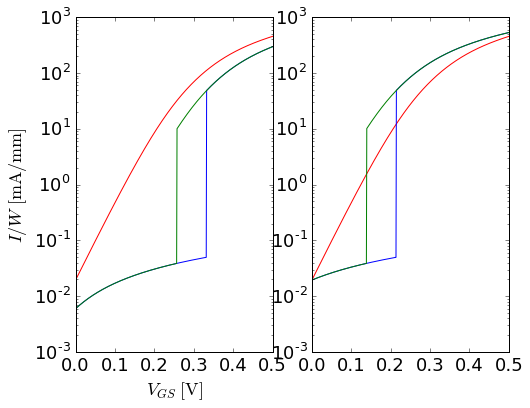

In [11]:
out=HTML()
vo2=None
fet2=None
hf=None
hf2=None
VTm,VTp=[None]*2
@interact(L=FloatSlider(value=20,min=1,max=45,step=1,continuous_update=False),
          W=FloatSlider(value=10,min=.5,max=30,step=.5,continuous_update=False),
          T=FloatSlider(value=10,min=.5,max=20,step=.5,continuous_update=False))
def show_hf(L,W,T):
    global vo2, fet2,VTm,VTp, hf, hf2
    plt.figure(figsize=(12,6))
    
    vo2=VO2(L=L*1e-9,W=W*1e-9,T=T*1e-9,**vo2_params)
    hf=HyperFET(fet,vo2)
    shift=appr.shift(hf,VDD)
    fet2=fet.shifted(shift)
    hf2=HyperFET(fet2,vo2)
    
    VD=np.array(VDD)
    VG=np.linspace(0,VDD,500)

    plt.subplot(131)
    I=np.ravel(fet.ID(VD=VD,VG=VG))
    plt.plot(VG,I/fet.W,'r')
    
    If,Ib=[np.ravel(i) for i in hf.I_double(VD=VD,VG=VG)]
    plt.plot(VG,If/fet.W,'b')
    plt.plot(VG,Ib/fet.W,'g')
    
    
    
    plt.ylim(1e-3,1e3)
    plt.xlabel("$V_{GS}\;\mathrm{[V]}$")
    plt.ylabel("$I/W\;\mathrm{[mA/mm]}$")
    ylog()
    
    plt.subplot(132)    
    plt.plot(VG,I/fet2.W,'r')
    If2,Ib2=[np.ravel(i) for i in hf2.I_double(VD=VD,VG=VG)]
    plt.plot(VG,If2/fet2.W,'b')
    plt.plot(VG,Ib2/fet2.W,'g')
    
    
    
    plt.ylim(1e-3,1e3)
    plt.yticks([])
    ylog()
    
    out.value="Approx shift is {:.2g}mV, which equates the IOFF within {:.2g}%."\
    "  This is expected to increase ION by {:.2g}% and actually increases it by {:.2g}%"\
    .format(shift*1e3,(If2[0]-I[0])/I[0]*100,appr.shiftedgain(hf,VDD)*100-100,(If2[-1]-I[-1])/I[-1]*100)
    
    _,_,VTm,VTp=appr.shorthands(hf,VDD,None,"VTm","VTp",gridinput=False)
    
display(out)

In [12]:
appr.optsize(fet,VDD,Ml=1,Mr=0,**vo2_params)

l1  32.471600299611616
l2  52.3828922105
l  32.471600299611616
l2  68.0085151957
l  32.471600299611616
w  75.5424783373


(3.2471600299611613e-08, 7.5542478337302885e-09, 1e-08)

In [13]:
from itertools import product

In [14]:
ion0=fet.ID(VDD,VDD)
ioff0=fet.ID(VDD,0)

def sweep(L,WT):
    ION_extr=[]
    sg_appr=[]
    Ml=[]
    Mr=[]
    Mimt=[]
    for Li,WiTi in product(L,WT):
        Ti=Wi=np.sqrt(WiTi)
        vo2=VO2(L=Li*1e-9,W=Wi*1e-9,T=Ti*1e-9,**vo2_params)
        hf=HyperFET(fet,vo2)
        hf2=HyperFET(fet.shifted(appr.shift(hf,VD)),vo2)
        IONi=hf2.I(VD=VDD,VG=VDD,direc=Direction.FORWARD)
        #print(np.ravel(IONi))
        #print(IONu,IONl)
        #print(Li,extr.boundaries_nonhysteretic(hf2,VDD))
        if extr.boundaries_nonhysteretic(hf2,VDD) and (hf2.I(VD=VDD,VG=0,direc=Direction.FORWARD)-ioff0)/ioff0<.1:
            ION_extr+=[IONi]
        else:
            ION_extr+=[np.NaN]
        Ml+=[appr.Ill(hf2,VDD)/ioff0-1]
        Mr+=[(VDD-appr.Vright(hf2,VDD))/fet.Vth]
        Mimt+=[VDD-hf2.pcr.V_IMT-fet.Vth/2]
        if Ml[-1]>0 and Mr[-1]>0 and Mimt[-1]>0:
            sg_appr+=[appr.shiftedgain(hf,VDD)]
        else:
            sg_appr+=[np.NaN]

    ION_extr=np.array(ION_extr)
    ION_appr=np.array(sg_appr)*ion0

    return ION_extr,ION_appr,Ml,Mr,Mimt

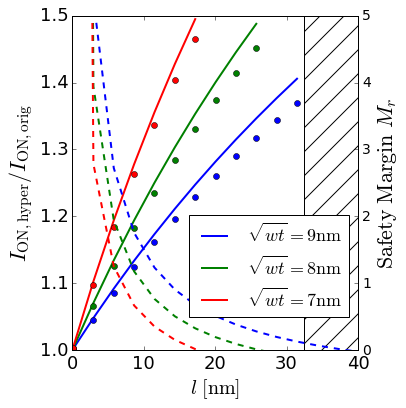

In [15]:
plt.figure(figsize=(6,6))
main=plt.gca()
#marg=plt.axes([.57,.17,.3,.26])
marg=main.twinx()
L=np.linspace(0.1,40.0,15)

#W=10
#ION_extr,ION_appr,Ml,Mr,Mimt=sweep(L,[W**2])   # sqrt(18*5)
#plt.sca(main)
#lp=plt.plot(L,ION_appr/ion0,linewidth=2,label="$\sqrt{{wt}}={:g}\mathrm{{nm}}$".format(W))[0]
#plt.plot(L,ION_extr/ion0,'o',color=lp.get_color())
#plt.sca(marg)
#plt.plot(L,Ml,'--',color=lp.get_color(),linewidth=2)
##plt.plot(L,Mr,'--',color=lp.get_color())
##plt.plot(L,Mimt,'-.',color=lp.get_color())

W=9
ION_extr,ION_appr,Ml,Mr,Mimt=sweep(L,[W**2]) # sqrt(15*5)
plt.sca(main)
lp=plt.plot(L,ION_appr/ion0,linewidth=2,label="$\sqrt{{wt}}={:g}\mathrm{{nm}}$".format(W))[0]
plt.plot(L,ION_extr/ion0,'o',color=lp.get_color())
plt.sca(marg)
plt.plot(L,Ml,'--',color=lp.get_color(),linewidth=2)
#plt.plot(L,Mr,'--',color=lp.get_color())
#plt.plot(L,Mimt,'-.',color=lp.get_color())

W=8
ION_extr,ION_appr,Ml,Mr,Mimt=sweep(L,[W**2])
plt.sca(main)
lp=plt.plot(L,ION_appr/ion0,linewidth=2,label="$\sqrt{{wt}}={:g}\mathrm{{nm}}$".format(W))[0]
plt.plot(L,ION_extr/ion0,'o',color=lp.get_color())
plt.sca(marg)
plt.plot(L,Ml,'--',color=lp.get_color(),linewidth=2)
#plt.plot(L,Mr,'--',color=lp.get_color())
#plt.plot(L,Mimt,'-.',color=lp.get_color())

W=7
ION_extr,ION_appr,Ml,Mr,Mimt=sweep(L,[W**2])
plt.sca(main)
lp=plt.plot(L,ION_appr/ion0,linewidth=2,label="$\sqrt{{wt}}={:g}\mathrm{{nm}}$".format(W))[0]
plt.plot(L,ION_extr/ion0,'o',color=lp.get_color())
plt.sca(marg)
plt.plot(L,Ml,'--',color=lp.get_color(),linewidth=2)
#plt.plot(L,Mr,'--',color=lp.get_color())
#plt.plot(L,Mimt,'-.',color=lp.get_color())


plt.sca(main)
plt.ylabel(r"$I_\mathrm{ON,hyper}/I_\mathrm{ON,orig}$",fontsize=22)
plt.xlabel(r"$l\mathrm{\ [nm]}$",fontsize=20)
plt.ylim(1)
plt.xlim(0,40)
handles1, labels1 = main.get_legend_handles_labels()
plt.sca(marg)
plt.legend(handles1,labels1,loc="center right",bbox_to_anchor=(1,.25),fontsize=18)
plt.ylim(0,5)
plt.tick_params(labelsize=14)
plt.gca().xaxis.set_major_locator(plticker.MultipleLocator(10))

mintb=(VDD-fet.Vth/2)/(vo2_params['J_IMT']*vo2_params['rho_i'])
plt.gca().add_patch(patches.Rectangle(
        (mintb*1e9,plt.ylim()[0]),
        plt.xlim()[1]-mintb*1e9,
        plt.ylim()[1]-plt.ylim()[0],
        hatch='/',edgecolor='k',fill=None))
plt.ylabel("$\mathrm{Safety\ Margin\ } M_r$",fontsize=22)
#plt.title("$\mathrm{Safety\ Margin}$",fontsize=18)

plt.tight_layout()

plt.savefig(os.path.join(ABSTRACT_IMAGE_DIR,"GainvsL.eps"))
plt.savefig(os.path.join(ABSTRACT_IMAGE_DIR,"GainvsL.png"))

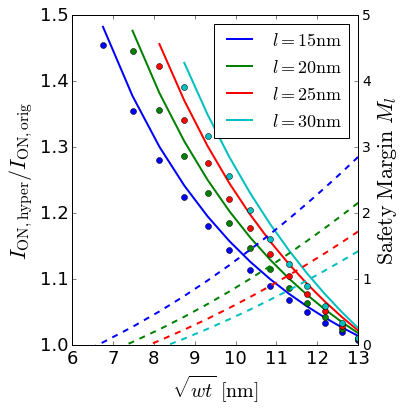

In [16]:
plt.figure(figsize=(6,6))
main=plt.gca()
#marg=plt.axes([.57,.17,.3,.26])
marg=main.twinx()
W=np.sqrt(np.linspace(13**2,5**2,15))

L=15
ION_extr,ION_appr,Ml,Mr,Mimt=sweep([L],W**2)
plt.sca(main)
lp=plt.plot(W,ION_appr/ion0,linewidth=2,label="$l={:g}\mathrm{{nm}}$".format(L))[0]
plt.plot(W,ION_extr/ion0,'o',color=lp.get_color())
plt.sca(marg)
plt.plot(W,Ml,'--',color=lp.get_color(),linewidth=2)
#plt.plot(L,Mr,'--',color=lp.get_color())
#plt.plot(L,Mimt,'-.',color=lp.get_color())

L=20
ION_extr,ION_appr,Ml,Mr,Mimt=sweep([L],W**2)
plt.sca(main)
lp=plt.plot(W,ION_appr/ion0,linewidth=2,label="$l={:g}\mathrm{{nm}}$".format(L))[0]
plt.plot(W,ION_extr/ion0,'o',color=lp.get_color())
plt.sca(marg)
plt.plot(W,Ml,'--',color=lp.get_color(),linewidth=2)
#plt.plot(L,Mr,'--',color=lp.get_color())
#plt.plot(L,Mimt,'-.',color=lp.get_color())

L=25
ION_extr,ION_appr,Ml,Mr,Mimt=sweep([L],W**2)
plt.sca(main)
lp=plt.plot(W,ION_appr/ion0,linewidth=2,label="$l={:g}\mathrm{{nm}}$".format(L))[0]
plt.plot(W,ION_extr/ion0,'o',color=lp.get_color())
plt.sca(marg)
plt.plot(W,Ml,'--',color=lp.get_color(),linewidth=2)
#plt.plot(L,Mr,'--',color=lp.get_color())
#plt.plot(L,Mimt,'-.',color=lp.get_color())

L=30
ION_extr,ION_appr,Ml,Mr,Mimt=sweep([L],W**2)
plt.sca(main)
lp=plt.plot(W,ION_appr/ion0,linewidth=2,label="$l={:g}\mathrm{{nm}}$".format(L))[0]
plt.plot(W,ION_extr/ion0,'o',color=lp.get_color())
plt.sca(marg)
plt.plot(W,Ml,'--',color=lp.get_color(),linewidth=2)
#plt.plot(L,Mr,'--',color=lp.get_color())
#plt.plot(L,Mimt,'-.',color=lp.get_color())


plt.sca(main)
plt.ylabel(r"$I_\mathrm{ON,hyper}/I_\mathrm{ON,orig}$",fontsize=22)
plt.xlabel(r"$\sqrt{wt}\mathrm{\ [nm]}$",fontsize=20)
plt.ylim(1)
plt.xlim(6,13)
handles1, labels1 = main.get_legend_handles_labels()
plt.sca(marg)
plt.legend(handles1,labels1,loc="upper right",fontsize=18)#,bbox_to_anchor=(1,.25)
plt.ylim(0,5)
plt.tick_params(labelsize=14)
#plt.gca().xaxis.set_major_locator(plticker.MultipleLocator(10))

plt.ylabel("$\mathrm{Safety\ Margin\ } M_l$",fontsize=22)
#plt.title("$\mathrm{Safety\ Margin}$",fontsize=18)

plt.tight_layout()

plt.savefig(os.path.join(ABSTRACT_IMAGE_DIR,"GainvsW.eps"))
plt.savefig(os.path.join(ABSTRACT_IMAGE_DIR,"GainvsW.png"))

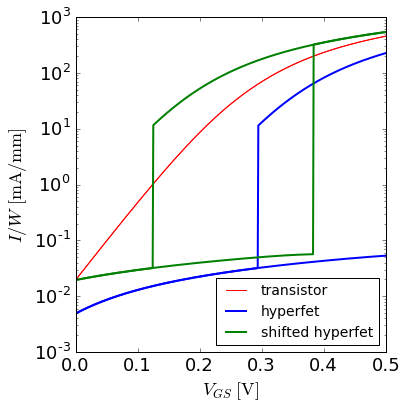

In [17]:
out=HTML()
def show_hf(L,W,T):
    global vo2, fet2,VTm,VTp, hf, hf2
    plt.figure(figsize=(6,6))
    
    vo2=VO2(L=L,W=W,T=T,**vo2_params)
    hf=HyperFET(fet,vo2)
    shift=appr.shift(hf,VDD)
    fet2=fet.shifted(shift)
    hf2=HyperFET(fet2,vo2)
    
    VD=np.array(VDD)
    VG=np.linspace(0,VDD,500)

    #plt.subplot(131)
    I=np.ravel(fet.ID(VD=VD,VG=VG))
    plt.plot(VG,I/fet.W,'r',label='transistor')
    
    If,Ib=[np.ravel(i) for i in hf.I_double(VD=VD,VG=VG)]
    plt.plot(VG,If/fet.W,'b',label='hyperfet',linewidth=2)
    plt.plot(VG,Ib/fet.W,'b',linewidth=2)
    
    
    
    plt.ylim(1e-3,1e3)
    plt.xlabel("$V_{GS}\;\mathrm{[V]}$")
    plt.ylabel("$I/W\;\mathrm{[mA/mm]}$")
    ylog()
    
    #plt.subplot(132)    
    plt.plot(VG,I/fet2.W,'r')
    If2,Ib2=[np.ravel(i) for i in hf2.I_double(VD=VD,VG=VG)]
    plt.plot(VG,If2/fet2.W,'g',label='shifted hyperfet',linewidth=2)
    plt.plot(VG,Ib2/fet2.W,'g',linewidth=2)
    
    #ylog()
    #plt.ylim(1e-3,1e3)
    #plt.yticks([])
    
    plt.legend(loc='lower right',fontsize=14)
    
    Ill=extr.left(VG,If,Ib)[1]
    out.value="Approx shift is {:.2g}mV, which equates the IOFF within {:.2g}%."\
    "  This is expected to increase ION by {:.2g}% and actually increases it by {:.2g}%."\
    "  Ml effective is {:.3g}."\
    .format(shift*1e3,(If2[0]-I[0])/I[0]*100,appr.shiftedgain(hf,VDD)*100-100,(If2[-1]-I[-1])/I[-1]*100,Ill/If2[0])
    
    _,_,VTm,VTp=appr.shorthands(hf,VDD,None,"VTm","VTp",gridinput=False)

show_hf(*appr.optsize(fet,VDD,Ml=1.5,Mr=2,**vo2_params,verbose=False))
display(out)

plt.tight_layout()
plt.savefig(os.path.join(ABSTRACT_IMAGE_DIR,"opthf.eps"))
plt.savefig(os.path.join(ABSTRACT_IMAGE_DIR,"opthf.png"))